In [32]:
# Feature Engineering - Log Polar Histograms
import cv2

print('OpenCV version: {}'.format(cv2.__version__))

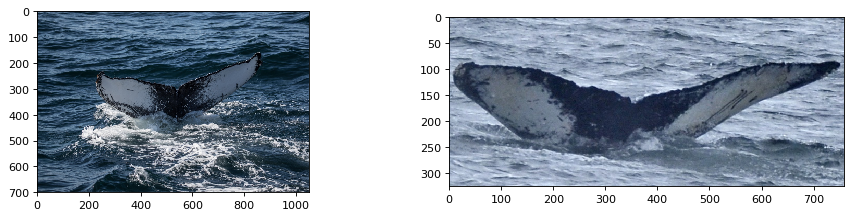

In [33]:
import numpy as np

# Read in two different whales
im1 = cv2.cvtColor(
    cv2.imread(r'/home/share/dataset/kaggle_whale/train/0000e88ab.jpg', cv2.IMREAD_UNCHANGED),
    cv2.COLOR_BGR2RGB
)
im1_notch = np.array([543, 308])
im2 = cv2.cvtColor(
    cv2.imread(r'/home/share/dataset/kaggle_whale/train/0001f9222.jpg', cv2.IMREAD_UNCHANGED),
    cv2.COLOR_BGR2RGB
)
im2_notch = np.array([355, 167])

# Plot them
import matplotlib.pyplot as plt

f = plt.figure(
    num=1, 
    figsize=(14, int(14*1/float(4))), 
    dpi=80, 
    facecolor='w', 
    edgecolor='k'
)
plt.subplot(1,2,1)
f.gca().grid(False)
plt.imshow(im1)
plt.subplot(1,2,2)
f.gca().grid(False)
plt.imshow(im2)
plt.show()

In [39]:
from scipy import interpolate

def cart2pol(cart_coord, center):
    rho = np.sqrt(np.sum(np.power(cart_coord, 2.0)))
    phi = np.arctan2(cart_coord[1]/cart_coord[0])
    return rho, phi

def pol2cart(pol_coord, center):
    x = pol_coord[:,0] * np.cos(pol_coord[:,1]) + center[0]
    y = pol_coord[:,0] * np.sin(pol_coord[:,1]) + center[1]
    return np.vstack((x, y)).T

# Convert images to polar images at centerpoint
def cart_to_polar_image(cart_image, center):
    try:
        channels = cart_image.shape[2]
    except:
        channels = 1
    # Inverse transform polar mesh grid into cartesian coordinates
    image_R = np.sqrt((cart_image.shape[0]/2)**2 + (cart_image.shape[1]/2)**2)
    image_d_r = image_R / (np.max(cart_image.shape[:2]) / 2.0)
    # Step radius by 1px in the longest dimension
    image_r = np.arange(0, image_R, image_d_r)
    # Try not to change the total number of pixels in the image
    image_n_theta = cart_image.shape[0]*cart_image.shape[1]/image_r.shape[0]
    image_d_theta = 2*np.pi/image_n_theta
    image_theta = np.arange(0, 2*np.pi, image_d_theta)
    pol_image_shape = (image_r.shape[0], image_theta.shape[0], channels)
    pol_image = np.empty(pol_image_shape)
    image_r_mesh, image_theta_mesh = np.meshgrid(image_r, image_theta)
    image_r_theta = np.dstack((image_r_mesh, image_theta_mesh))
    image_r_theta_in_cart = np.reshape(
        pol2cart(np.reshape(image_r_theta, (image_r_theta.shape[0]*image_r_theta.shape[1], image_r_theta.shape[2])), center),
        image_r_theta.shape
    )
    # Bilinearly interpolate image into polar image
    for polar, cart in zip(
            np.reshape(image_r_theta, (np.multiply(*image_r_theta.shape[0:2]), image_r_theta.shape[2])), 
            np.reshape(image_r_theta_in_cart, (np.multiply(*image_r_theta_in_cart.shape[0:2]), image_r_theta_in_cart.shape[2]))
        ):
        # Figure out how to store the rotated image in polar coordinates (can't have fractional coordinates)
        # Bilinearly interpolate the cartesian image
        pass
    
    return pol_image

im1_polar = cart_to_polar_image(im1, im1_notch)
im2_polar = cart_to_polar_image(im2, im2_notch)

f = plt.figure(
    num=1, 
    figsize=(14, int(14*1/float(4))), 
    dpi=80, 
    facecolor='w', 
    edgecolor='k'
)
plt.subplot(1,2,1)
f.gca().grid(False)
plt.imshow(im1_polar)
plt.subplot(1,2,2)
f.gca().grid(False)
plt.imshow(im2_polar)
plt.show()

[0. 0.], [543. 308.]
[1.20185043 0.        ], [544.20185043 308.        ]
[2.40370085 0.        ], [545.40370085 308.        ]
[3.60555128 0.        ], [546.60555128 308.        ]
[4.8074017 0.       ], [547.8074017 308.       ]
[6.00925213 0.        ], [549.00925213 308.        ]
[7.21110255 0.        ], [550.21110255 308.        ]
[8.41295298 0.        ], [551.41295298 308.        ]
[9.6148034 0.       ], [552.6148034 308.       ]
[10.81665383  0.        ], [553.81665383 308.        ]
[12.01850425  0.        ], [555.01850425 308.        ]
[13.22035468  0.        ], [556.22035468 308.        ]
[14.4222051  0.       ], [557.4222051 308.       ]
[15.62405553  0.        ], [558.62405553 308.        ]
[16.82590595  0.        ], [559.82590595 308.        ]
[18.02775638  0.        ], [561.02775638 308.        ]
[19.2296068  0.       ], [562.2296068 308.       ]
[20.43145723  0.        ], [563.43145723 308.        ]
[21.63330765  0.        ], [564.63330765 308.        ]
[22.83515808  0.     


[1.50231303e+02 8.97597901e-03], [693.22525125 309.34845492]
[1.51433154e+02 8.97597901e-03], [694.42705326 309.35924256]
[1.52635004e+02 8.97597901e-03], [695.62885527 309.3700302 ]
[1.53836854e+02 8.97597901e-03], [696.83065728 309.38081783]
[1.55038705e+02 8.97597901e-03], [698.03245929 309.39160547]
[1.56240555e+02 8.97597901e-03], [699.2342613  309.40239311]
[1.57442406e+02 8.97597901e-03], [700.43606331 309.41318075]
[1.58644256e+02 8.97597901e-03], [701.63786532 309.42396839]
[1.59846107e+02 8.97597901e-03], [702.83966733 309.43475603]
[1.61047957e+02 8.97597901e-03], [704.04146934 309.44554367]
[1.62249807e+02 8.97597901e-03], [705.24327135 309.45633131]
[1.63451658e+02 8.97597901e-03], [706.44507336 309.46711895]
[1.64653508e+02 8.97597901e-03], [707.64687537 309.47790659]
[1.65855359e+02 8.97597901e-03], [708.84867738 309.48869423]
[1.67057209e+02 8.97597901e-03], [710.05047939 309.49948187]
[1.68259060e+02 8.97597901e-03], [711.2522814  309.51026951]
[1.69460910e+02 8.97597


[2.95655205e+02 1.79519580e-02], [838.60756505 313.30730474]
[2.96857055e+02 1.79519580e-02], [839.80922182 313.32887915]
[2.98058905e+02 1.79519580e-02], [841.01087859 313.35045356]
[2.99260756e+02 1.79519580e-02], [842.21253536 313.37202797]
[3.00462606e+02 1.79519580e-02], [843.41419213 313.39360238]
[3.01664457e+02 1.79519580e-02], [844.6158489  313.41517679]
[3.02866307e+02 1.79519580e-02], [845.81750566 313.4367512 ]
[3.04068158e+02 1.79519580e-02], [847.01916243 313.45832561]
[3.05270008e+02 1.79519580e-02], [848.2208192  313.47990002]
[3.06471858e+02 1.79519580e-02], [849.42247597 313.50147443]
[3.07673709e+02 1.79519580e-02], [850.62413274 313.52304884]
[3.08875559e+02 1.79519580e-02], [851.82578951 313.54462325]
[3.1007741e+02 1.7951958e-02], [853.02744627 313.56619766]
[3.1127926e+02 1.7951958e-02], [854.22910304 313.58777207]
[3.12481111e+02 1.79519580e-02], [855.43075981 313.60934648]
[3.13682961e+02 1.79519580e-02], [856.63241658 313.63092089]
[3.14884811e+02 1.79519580e


[2.19938628e+02 2.69279370e-02], [762.85889236 313.9217778 ]
[2.21140478e+02 2.69279370e-02], [764.06030707 313.95413724]
[2.22342329e+02 2.69279370e-02], [765.26172178 313.98649668]
[2.23544179e+02 2.69279370e-02], [766.46313649 314.01885612]
[2.2474603e+02 2.6927937e-02], [767.6645512  314.05121557]
[2.2594788e+02 2.6927937e-02], [768.86596592 314.08357501]
[2.2714973e+02 2.6927937e-02], [770.06738063 314.11593445]
[2.28351581e+02 2.69279370e-02], [771.26879534 314.14829389]
[2.29553431e+02 2.69279370e-02], [772.47021005 314.18065333]
[2.30755282e+02 2.69279370e-02], [773.67162477 314.21301277]
[2.31957132e+02 2.69279370e-02], [774.87303948 314.24537221]
[2.33158982e+02 2.69279370e-02], [776.07445419 314.27773166]
[2.34360833e+02 2.69279370e-02], [777.2758689 314.3100911]
[2.35562683e+02 2.69279370e-02], [778.47728362 314.34245054]
[2.36764534e+02 2.69279370e-02], [779.67869833 314.37480998]
[2.37966384e+02 2.69279370e-02], [780.88011304 314.40716942]
[2.39168235e+02 2.69279370e-02]

[3.53344025e+02 3.59039160e-02], [896.11630313 320.68370872]
[3.54545875e+02 3.59039160e-02], [897.31737899 320.72685059]
[3.55747726e+02 3.59039160e-02], [898.51845485 320.76999245]
[3.56949576e+02 3.59039160e-02], [899.71953071 320.81313432]
[3.58151427e+02 3.59039160e-02], [900.92060657 320.85627619]
[3.59353277e+02 3.59039160e-02], [902.12168243 320.89941805]
[3.60555128e+02 3.59039160e-02], [903.32275829 320.94255992]
[3.61756978e+02 3.59039160e-02], [904.52383415 320.98570179]
[3.62958828e+02 3.59039160e-02], [905.72491001 321.02884365]
[3.64160679e+02 3.59039160e-02], [906.92598587 321.07198552]
[3.65362529e+02 3.59039160e-02], [908.12706174 321.11512738]
[3.6656438e+02 3.5903916e-02], [909.3281376  321.15826925]
[3.6776623e+02 3.5903916e-02], [910.52921346 321.20141112]
[3.68968081e+02 3.59039160e-02], [911.73028932 321.24455298]
[3.70169931e+02 3.59039160e-02], [912.93136518 321.28769485]
[3.71371781e+02 3.59039160e-02], [914.13244104 321.33083672]
[3.72573632e+02 3.59039160e-


[3.16086662e+02 4.48798951e-02], [858.76838358 322.18117446]
[3.17288512e+02 4.48798951e-02], [859.96902382 322.23509527]
[3.18490363e+02 4.48798951e-02], [861.16966406 322.28901609]
[3.19692213e+02 4.48798951e-02], [862.37030431 322.3429369 ]
[3.20894064e+02 4.48798951e-02], [863.57094455 322.39685772]
[3.22095914e+02 4.48798951e-02], [864.77158479 322.45077854]
[3.23297764e+02 4.48798951e-02], [865.97222503 322.50469935]
[3.24499615e+02 4.48798951e-02], [867.17286527 322.55862017]
[3.25701465e+02 4.48798951e-02], [868.37350551 322.61254098]
[3.26903316e+02 4.48798951e-02], [869.57414576 322.6664618 ]
[3.28105166e+02 4.48798951e-02], [870.774786   322.72038261]
[3.29307016e+02 4.48798951e-02], [871.97542624 322.77430343]
[3.30508867e+02 4.48798951e-02], [873.17606648 322.82822424]
[3.31710717e+02 4.48798951e-02], [874.37670672 322.88214506]
[3.32912568e+02 4.48798951e-02], [875.57734696 322.93606587]
[3.34114418e+02 4.48798951e-02], [876.77798721 322.98998669]
[3.35316269e+02 4.48798


[4.11032845e+02 5.38558741e-02], [953.4368983  330.12583371]
[4.12234696e+02 5.38558741e-02], [954.63700619 330.19052913]
[4.13436546e+02 5.38558741e-02], [955.83711408 330.25522455]
[4.14638397e+02 5.38558741e-02], [957.03722197 330.31991997]
[4.15840247e+02 5.38558741e-02], [958.23732986 330.38461539]
[4.17042098e+02 5.38558741e-02], [959.43743774 330.44931081]
[4.18243948e+02 5.38558741e-02], [960.63754563 330.51400623]
[4.19445798e+02 5.38558741e-02], [961.83765352 330.57870165]
[4.20647649e+02 5.38558741e-02], [963.03776141 330.64339707]
[4.21849499e+02 5.38558741e-02], [964.2378693  330.70809249]
[4.23051350e+02 5.38558741e-02], [965.43797719 330.77278791]
[4.24253200e+02 5.38558741e-02], [966.63808508 330.83748333]
[4.25455051e+02 5.38558741e-02], [967.83819297 330.90217875]
[4.26656901e+02 5.38558741e-02], [969.03830086 330.96687417]
[4.27858751e+02 5.38558741e-02], [970.23840875 331.03156959]
[4.29060602e+02 5.38558741e-02], [971.43851664 331.09626501]
[4.30262452e+02 5.38558


[5.36025290e+02 6.28318531e-02], [1077.96756615  341.65730642]
[5.37227140e+02 6.28318531e-02], [1079.167045    341.73277123]
[5.38428990e+02 6.28318531e-02], [1080.36652385  341.80823604]
[5.39630841e+02 6.28318531e-02], [1081.5660027   341.88370085]
[5.40832691e+02 6.28318531e-02], [1082.76548154  341.95916567]
[5.42034542e+02 6.28318531e-02], [1083.96496039  342.03463048]
[5.43236392e+02 6.28318531e-02], [1085.16443924  342.11009529]
[5.44438243e+02 6.28318531e-02], [1086.36391809  342.1855601 ]
[5.45640093e+02 6.28318531e-02], [1087.56339694  342.26102492]
[5.46841943e+02 6.28318531e-02], [1088.76287578  342.33648973]
[5.48043794e+02 6.28318531e-02], [1089.96235463  342.41195454]
[5.49245644e+02 6.28318531e-02], [1091.16183348  342.48741935]
[5.50447495e+02 6.28318531e-02], [1092.36131233  342.56288417]
[5.51649345e+02 6.28318531e-02], [1093.56079118  342.63834898]
[5.52851196e+02 6.28318531e-02], [1094.76027002  342.71381379]
[5.54053046e+02 6.28318531e-02], [1095.95974887  342.7


[16.82590595  0.07629582], [559.77695746 309.28250122]
[18.02775638  0.07629582], [560.97531157 309.37410845]
[19.2296068   0.07629582], [562.17366567 309.46571568]
[20.43145723  0.07629582], [563.37201978 309.55732291]
[21.63330765  0.07629582], [564.57037388 309.64893014]
[22.83515808  0.07629582], [565.76872799 309.74053737]
[24.0370085   0.07629582], [566.96708209 309.8321446 ]
[25.23885893  0.07629582], [568.1654362  309.92375183]
[26.44070935  0.07629582], [569.3637903  310.01535906]
[27.64255978  0.07629582], [570.5621444  310.10696629]
[28.8444102   0.07629582], [571.76049851 310.19857352]
[30.04626063  0.07629582], [572.95885261 310.29018075]
[31.24811105  0.07629582], [574.15720672 310.38178798]
[32.44996148  0.07629582], [575.35556082 310.47339521]
[33.6518119   0.07629582], [576.55391493 310.56500244]
[34.85366233  0.07629582], [577.75226903 310.65660967]
[36.05551275  0.07629582], [578.95062314 310.7482169 ]
[37.25736318  0.07629582], [580.14897724 310.83982413]
[38.45921


[67.30362381  0.0852718 ], [610.0590803  313.73214862]
[68.50547423  0.0852718 ], [611.25656387 313.83450841]
[69.70732466  0.0852718 ], [612.45404745 313.93686821]
[70.90917508  0.0852718 ], [613.65153103 314.03922801]
[72.11102551  0.0852718 ], [614.8490146 314.1415878]
[73.31287593  0.0852718 ], [616.04649818 314.2439476 ]
[74.51472636  0.0852718 ], [617.24398176 314.3463074 ]
[75.71657678  0.0852718 ], [618.44146533 314.44866719]
[76.91842721  0.0852718 ], [619.63894891 314.55102699]
[78.12027764  0.0852718 ], [620.83643249 314.65338679]
[79.32212806  0.0852718 ], [622.03391606 314.75574658]
[80.52397849  0.0852718 ], [623.23139964 314.85810638]
[81.72582891  0.0852718 ], [624.42888322 314.96046618]
[82.92767934  0.0852718 ], [625.62636679 315.06282597]
[84.12952976  0.0852718 ], [626.82385037 315.16518577]
[8.53313802e+01 8.52718006e-02], [628.02133395 315.26754557]
[8.65332306e+01 8.52718006e-02], [629.21881752 315.36990536]
[8.77350810e+01 8.52718006e-02], [630.4163011  315.472


[1.59846107e+02 9.42477796e-02], [702.13670387 323.04284748]
[1.61047957e+02 9.42477796e-02], [703.33322044 323.15595159]
[1.62249807e+02 9.42477796e-02], [704.52973701 323.26905571]
[1.63451658e+02 9.42477796e-02], [705.72625358 323.38215983]
[1.64653508e+02 9.42477796e-02], [706.92277015 323.49526394]
[1.65855359e+02 9.42477796e-02], [708.11928672 323.60836806]
[1.67057209e+02 9.42477796e-02], [709.31580329 323.72147218]
[1.68259060e+02 9.42477796e-02], [710.51231986 323.83457629]
[1.69460910e+02 9.42477796e-02], [711.70883643 323.94768041]
[1.70662760e+02 9.42477796e-02], [712.905353   324.06078452]
[1.71864611e+02 9.42477796e-02], [714.10186957 324.17388864]
[1.73066461e+02 9.42477796e-02], [715.29838614 324.28699276]
[1.74268312e+02 9.42477796e-02], [716.49490271 324.40009687]
[1.75470162e+02 9.42477796e-02], [717.69141928 324.51320099]
[1.76672012e+02 9.42477796e-02], [718.88793585 324.62630511]
[1.77873863e+02 9.42477796e-02], [720.08445242 324.73940922]
[1.79075713e+02 9.42477


[2.75223747e+02 1.03223759e-01], [816.75877447 336.35920508]
[2.76425598e+02 1.03223759e-01], [817.95422763 336.48304441]
[2.77627448e+02 1.03223759e-01], [819.1496808  336.60688373]
[2.78829299e+02 1.03223759e-01], [820.34513396 336.73072305]
[2.80031149e+02 1.03223759e-01], [821.54058712 336.85456238]
[2.81232999e+02 1.03223759e-01], [822.73604029 336.9784017 ]
[2.82434850e+02 1.03223759e-01], [823.93149345 337.10224103]
[2.83636700e+02 1.03223759e-01], [825.12694661 337.22608035]
[2.84838551e+02 1.03223759e-01], [826.32239978 337.34991967]
[2.86040401e+02 1.03223759e-01], [827.51785294 337.473759  ]
[2.87242252e+02 1.03223759e-01], [828.7133061  337.59759832]
[2.88444102e+02 1.03223759e-01], [829.90875927 337.72143764]
[2.89645952e+02 1.03223759e-01], [831.10421243 337.84527697]
[2.90847803e+02 1.03223759e-01], [832.29966559 337.96911629]
[2.92049653e+02 1.03223759e-01], [833.49511876 338.09295561]
[2.93251504e+02 1.03223759e-01], [834.69057192 338.21679494]
[2.94453354e+02 1.03223


[3.04068158e+02 1.12199738e-01], [845.15624081 342.04483196]
[3.05270008e+02 1.12199738e-01], [846.35053425 342.17939651]
[3.06471858e+02 1.12199738e-01], [847.5448277  342.31396107]
[3.07673709e+02 1.12199738e-01], [848.73912114 342.44852562]
[3.08875559e+02 1.12199738e-01], [849.93341458 342.58309017]
[3.10077410e+02 1.12199738e-01], [851.12770802 342.71765473]
[3.11279260e+02 1.12199738e-01], [852.32200146 342.85221928]
[3.12481111e+02 1.12199738e-01], [853.5162949  342.98678383]
[3.13682961e+02 1.12199738e-01], [854.71058835 343.12134839]
[3.14884811e+02 1.12199738e-01], [855.90488179 343.25591294]
[3.16086662e+02 1.12199738e-01], [857.09917523 343.39047749]
[3.17288512e+02 1.12199738e-01], [858.29346867 343.52504205]
[3.18490363e+02 1.12199738e-01], [859.48776211 343.6596066 ]
[3.19692213e+02 1.12199738e-01], [860.68205556 343.79417115]
[3.20894064e+02 1.12199738e-01], [861.876349   343.92873571]
[3.22095914e+02 1.12199738e-01], [863.07064244 344.06330026]
[3.23297764e+02 1.12199


[3.89399538e+02 1.21175717e-01], [929.54414962 355.070377  ]
[3.90601388e+02 1.21175717e-01], [930.73718712 355.21565594]
[3.91803239e+02 1.21175717e-01], [931.93022462 355.36093488]
[3.93005089e+02 1.21175717e-01], [933.12326212 355.50621382]
[3.94206939e+02 1.21175717e-01], [934.31629962 355.65149276]
[3.95408790e+02 1.21175717e-01], [935.50933712 355.7967717 ]
[3.96610640e+02 1.21175717e-01], [936.70237462 355.94205065]
[3.97812491e+02 1.21175717e-01], [937.89541212 356.08732959]
[3.99014341e+02 1.21175717e-01], [939.08844962 356.23260853]
[4.00216192e+02 1.21175717e-01], [940.28148711 356.37788747]
[4.01418042e+02 1.21175717e-01], [941.47452461 356.52316641]
[4.02619892e+02 1.21175717e-01], [942.66756211 356.66844535]
[4.03821743e+02 1.21175717e-01], [943.86059961 356.81372429]
[4.05023593e+02 1.21175717e-01], [945.05363711 356.95900324]
[4.06225444e+02 1.21175717e-01], [946.24667461 357.10428218]
[4.07427294e+02 1.21175717e-01], [947.43971211 357.24956112]
[4.08629145e+02 1.21175


[4.57905012e+02 1.30151696e-01], [997.03215093 367.42899901]
[4.59106862e+02 1.30151696e-01], [998.22383636 367.58498064]
[4.60308713e+02 1.30151696e-01], [999.4155218  367.74096226]
[4.61510563e+02 1.30151696e-01], [1000.60720723  367.89694389]
[4.62712414e+02 1.30151696e-01], [1001.79889267  368.05292551]
[4.63914264e+02 1.30151696e-01], [1002.99057811  368.20890714]
[4.65116115e+02 1.30151696e-01], [1004.18226354  368.36488876]
[4.66317965e+02 1.30151696e-01], [1005.37394898  368.52087039]
[4.67519815e+02 1.30151696e-01], [1006.56563441  368.67685201]
[4.68721666e+02 1.30151696e-01], [1007.75731985  368.83283364]
[4.69923516e+02 1.30151696e-01], [1008.94900528  368.98881526]
[4.71125367e+02 1.30151696e-01], [1010.14069072  369.14479689]
[4.72327217e+02 1.30151696e-01], [1011.33237615  369.30077851]
[4.73529068e+02 1.30151696e-01], [1012.52406159  369.45676014]
[4.74730918e+02 1.30151696e-01], [1013.71574702  369.61274176]
[4.75932768e+02 1.30151696e-01], [1014.90743246  369.7687233


[36.05551275  0.14361566], [578.68432066 313.16035452]
[37.25736318  0.14361566], [579.87379802 313.33236634]
[38.4592136   0.14361566], [581.06327537 313.50437815]
[39.66106403  0.14361566], [582.25275273 313.67638997]
[40.86291446  0.14361566], [583.44223009 313.84840179]
[42.06476488  0.14361566], [584.63170744 314.02041361]
[43.26661531  0.14361566], [585.8211848  314.19242542]
[44.46846573  0.14361566], [587.01066215 314.36443724]
[45.67031616  0.14361566], [588.20013951 314.53644906]
[46.87216658  0.14361566], [589.38961686 314.70846087]
[48.07401701  0.14361566], [590.57909422 314.88047269]
[49.27586743  0.14361566], [591.76857157 315.05248451]
[50.47771786  0.14361566], [592.95804893 315.22449633]
[51.67956828  0.14361566], [594.14752628 315.39650814]
[52.88141871  0.14361566], [595.33700364 315.56851996]
[54.08326913  0.14361566], [596.526481   315.74053178]
[55.28511956  0.14361566], [597.71595835 315.9125436 ]
[56.48696998  0.14361566], [598.90543571 316.08455541]
[57.68882


[1.67057209e+02 1.52591643e-01], [708.11608242 333.39272411]
[1.68259060e+02 1.52591643e-01], [709.3039679  333.57540558]
[1.69460910e+02 1.52591643e-01], [710.49185339 333.75808705]
[1.70662760e+02 1.52591643e-01], [711.67973887 333.94076851]
[1.71864611e+02 1.52591643e-01], [712.86762436 334.12344998]
[1.73066461e+02 1.52591643e-01], [714.05550984 334.30613145]
[1.74268312e+02 1.52591643e-01], [715.24339533 334.48881292]
[1.75470162e+02 1.52591643e-01], [716.43128081 334.67149439]
[1.76672012e+02 1.52591643e-01], [717.6191663  334.85417586]
[1.77873863e+02 1.52591643e-01], [718.80705178 335.03685732]
[1.79075713e+02 1.52591643e-01], [719.99493727 335.21953879]
[1.80277564e+02 1.52591643e-01], [721.18282275 335.40222026]
[1.81479414e+02 1.52591643e-01], [722.37070824 335.58490173]
[1.82681265e+02 1.52591643e-01], [723.55859372 335.7675832 ]
[1.83883115e+02 1.52591643e-01], [724.74647921 335.95026467]
[1.85084965e+02 1.52591643e-01], [725.93436469 336.13294614]
[1.86286816e+02 1.52591


[116.57949124   0.16156762], [658.06119722 326.75363093]
[117.78134167   0.16156762], [659.24739513 326.94696733]
[118.98319209   0.16156762], [660.43359304 327.14030373]
[120.18504252   0.16156762], [661.61979094 327.33364013]
[121.38689294   0.16156762], [662.80598885 327.52697653]
[122.58874337   0.16156762], [663.99218676 327.72031293]
[123.79059379   0.16156762], [665.17838467 327.91364933]
[124.99244422   0.16156762], [666.36458258 328.10698574]
[126.19429464   0.16156762], [667.55078049 328.30032214]
[127.39614507   0.16156762], [668.7369784  328.49365854]
[128.59799549   0.16156762], [669.92317631 328.68699494]
[129.79984592   0.16156762], [671.10937422 328.88033134]
[131.00169634   0.16156762], [672.29557213 329.07366774]
[132.20354677   0.16156762], [673.48177004 329.26700414]
[133.40539719   0.16156762], [674.66796795 329.46034055]
[134.60724762   0.16156762], [675.85416586 329.65367695]
[135.80909804   0.16156762], [677.04036377 329.84701335]
[137.01094847   0.16156762], [


[1.85084965e+02 1.70543601e-01], [725.39987376 339.41226666]
[1.86286816e+02 1.70543601e-01], [726.58428852 339.61624242]
[1.87488666e+02 1.70543601e-01], [727.76870329 339.82021818]
[1.88690517e+02 1.70543601e-01], [728.95311805 340.02419393]
[1.89892367e+02 1.70543601e-01], [730.13753282 340.22816969]
[1.91094218e+02 1.70543601e-01], [731.32194758 340.43214545]
[1.92296068e+02 1.70543601e-01], [732.50636235 340.63612121]
[1.93497918e+02 1.70543601e-01], [733.69077711 340.84009696]
[1.94699769e+02 1.70543601e-01], [734.87519188 341.04407272]
[1.95901619e+02 1.70543601e-01], [736.05960664 341.24804848]
[1.97103470e+02 1.70543601e-01], [737.24402141 341.45202424]
[1.98305320e+02 1.70543601e-01], [738.42843617 341.65599999]
[1.99507171e+02 1.70543601e-01], [739.61285094 341.85997575]
[2.00709021e+02 1.70543601e-01], [740.7972657  342.06395151]
[2.01910871e+02 1.70543601e-01], [741.98168047 342.26792727]
[2.03112722e+02 1.70543601e-01], [743.16609523 342.47190302]
[2.04314572e+02 1.70543


[3.44931072e+02 1.79519580e-01], [882.38788779 369.58982114]
[3.46132922e+02 1.79519580e-01], [883.57042398 369.80441982]
[3.47334773e+02 1.79519580e-01], [884.75296018 370.0190185 ]
[3.48536623e+02 1.79519580e-01], [885.93549637 370.23361718]
[3.49738474e+02 1.79519580e-01], [887.11803256 370.44821586]
[3.50940324e+02 1.79519580e-01], [888.30056876 370.66281454]
[3.52142175e+02 1.79519580e-01], [889.48310495 370.87741322]
[3.53344025e+02 1.79519580e-01], [890.66564115 371.0920119 ]
[3.54545875e+02 1.79519580e-01], [891.84817734 371.30661058]
[3.55747726e+02 1.79519580e-01], [893.03071354 371.52120926]
[3.56949576e+02 1.79519580e-01], [894.21324973 371.73580794]
[3.58151427e+02 1.79519580e-01], [895.39578593 371.95040662]
[3.59353277e+02 1.79519580e-01], [896.57832212 372.1650053 ]
[3.60555128e+02 1.79519580e-01], [897.76085831 372.37960398]
[3.61756978e+02 1.79519580e-01], [898.94339451 372.59420266]
[3.62958828e+02 1.79519580e-01], [900.1259307  372.80880134]
[3.64160679e+02 1.79519

[4.72327217e+02 1.88495559e-01], [1006.96100352  396.50529485]
[4.73529068e+02 1.88495559e-01], [1008.14156587  396.73049916]
[4.74730918e+02 1.88495559e-01], [1009.32212822  396.95570348]
[4.75932768e+02 1.88495559e-01], [1010.50269057  397.18090779]
[4.77134619e+02 1.88495559e-01], [1011.68325292  397.4061121 ]
[4.78336469e+02 1.88495559e-01], [1012.86381527  397.63131642]
[4.79538320e+02 1.88495559e-01], [1014.04437761  397.85652073]
[4.80740170e+02 1.88495559e-01], [1015.22493996  398.08172504]
[4.81942020e+02 1.88495559e-01], [1016.40550231  398.30692935]
[4.83143871e+02 1.88495559e-01], [1017.58606466  398.53213367]
[4.84345721e+02 1.88495559e-01], [1018.76662701  398.75733798]
[4.85547572e+02 1.88495559e-01], [1019.94718936  398.98254229]
[4.86749422e+02 1.88495559e-01], [1021.12775171  399.2077466 ]
[4.87951273e+02 1.88495559e-01], [1022.30831406  399.43295092]
[4.89153123e+02 1.88495559e-01], [1023.48887641  399.65815523]
[4.90354973e+02 1.88495559e-01], [1024.66943876  399.88


[5.32419738e+02 1.97471538e-01], [1065.0725719   412.45576788]
[5.33621589e+02 1.97471538e-01], [1066.25106529  412.69155968]
[5.34823439e+02 1.97471538e-01], [1067.42955868  412.92735148]
[5.36025290e+02 1.97471538e-01], [1068.60805207  413.16314329]
[5.37227140e+02 1.97471538e-01], [1069.78654546  413.39893509]
[5.38428990e+02 1.97471538e-01], [1070.96503885  413.63472689]
[5.39630841e+02 1.97471538e-01], [1072.14353225  413.87051869]
[5.40832691e+02 1.97471538e-01], [1073.32202564  414.10631049]
[5.42034542e+02 1.97471538e-01], [1074.50051903  414.34210229]
[5.43236392e+02 1.97471538e-01], [1075.67901242  414.57789409]
[5.44438243e+02 1.97471538e-01], [1076.85750581  414.81368589]
[5.45640093e+02 1.97471538e-01], [1078.0359992   415.04947769]
[5.46841943e+02 1.97471538e-01], [1079.21449259  415.2852695 ]
[5.48043794e+02 1.97471538e-01], [1080.39298598  415.5210613 ]
[5.49245644e+02 1.97471538e-01], [1081.57147937  415.7568531 ]
[5.50447495e+02 1.97471538e-01], [1082.74997276  415.9


[7.21110255 0.21093551], [550.05127186 309.50982289]
[8.41295298 0.21093551], [551.22648384 309.76146004]
[9.6148034  0.21093551], [552.40169581 310.01309718]
[10.81665383  0.21093551], [553.57690779 310.26473433]
[12.01850425  0.21093551], [554.75211977 310.51637148]
[13.22035468  0.21093551], [555.92733174 310.76800863]
[14.4222051   0.21093551], [557.10254372 311.01964578]
[15.62405553  0.21093551], [558.2777557  311.27128292]
[16.82590595  0.21093551], [559.45296767 311.52292007]
[18.02775638  0.21093551], [560.62817965 311.77455722]
[19.2296068   0.21093551], [561.80339163 312.02619437]
[20.43145723  0.21093551], [562.9786036  312.27783151]
[21.63330765  0.21093551], [564.15381558 312.52946866]
[22.83515808  0.21093551], [565.32902756 312.78110581]
[24.0370085   0.21093551], [566.50423953 313.03274296]
[25.23885893  0.21093551], [567.67945151 313.28438011]
[26.44070935  0.21093551], [568.85466349 313.53601725]
[27.64255978  0.21093551], [570.02987546 313.7876544 ]
[28.8444102   0


[87.73508104  0.21991149], [628.62213619 327.13881496]
[88.93693146  0.21991149], [629.79504217 327.40099051]
[90.13878189  0.21991149], [630.96794814 327.66316606]
[91.34063231  0.21991149], [632.14085412 327.9253416 ]
[92.54248274  0.21991149], [633.31376009 328.18751715]
[93.74433316  0.21991149], [634.48666607 328.4496927 ]
[94.94618359  0.21991149], [635.65957204 328.71186825]
[96.14803401  0.21991149], [636.83247802 328.97404379]
[97.34988444  0.21991149], [638.005384   329.23621934]
[98.55173486  0.21991149], [639.17828997 329.49839489]
[99.75358529  0.21991149], [640.35119595 329.76057044]
[100.95543571   0.21991149], [641.52410192 330.02274598]
[102.15728614   0.21991149], [642.6970079  330.28492153]
[103.35913656   0.21991149], [643.86991387 330.54709708]
[104.56098699   0.21991149], [645.04281985 330.80927263]
[105.76283741   0.21991149], [646.21572582 331.07144817]
[106.96468784   0.21991149], [647.3886318  331.33362372]
[108.16653826   0.21991149], [648.56153777 331.59579

[158.64425612   0.22888746], [697.50672277 343.99545277]
[159.84610655   0.22888746], [698.67722824 344.2681456 ]
[161.04795697   0.22888746], [699.84773372 344.54083842]
[162.2498074    0.22888746], [701.01823919 344.81353124]
[163.45165782   0.22888746], [702.18874467 345.08622407]
[164.65350825   0.22888746], [703.35925014 345.35891689]
[165.85535867   0.22888746], [704.52975562 345.63160972]
[167.0572091    0.22888746], [705.70026109 345.90430254]
[168.25905952   0.22888746], [706.87076657 346.17699536]
[169.46090995   0.22888746], [708.04127205 346.44968819]
[170.66276037   0.22888746], [709.21177752 346.72238101]
[171.8646108    0.22888746], [710.382283   346.99507384]
[173.06646122   0.22888746], [711.55278847 347.26776666]
[174.26831165   0.22888746], [712.72329395 347.54045948]
[175.47016207   0.22888746], [713.89379942 347.81315231]
[176.6720125    0.22888746], [715.0643049  348.08584513]
[177.87386292   0.22888746], [716.23481037 348.35853796]
[179.07571335   0.22888746], [7


[3.08875559e+02 2.37863444e-01], [843.17874241 380.77934952]
[3.10077410e+02 2.37863444e-01], [844.34675308 381.06253765]
[3.11279260e+02 2.37863444e-01], [845.51476375 381.34572578]
[3.12481111e+02 2.37863444e-01], [846.68277442 381.62891391]
[3.13682961e+02 2.37863444e-01], [847.85078509 381.91210204]
[3.14884811e+02 2.37863444e-01], [849.01879576 382.19529017]
[3.16086662e+02 2.37863444e-01], [850.18680644 382.4784783 ]
[3.17288512e+02 2.37863444e-01], [851.35481711 382.76166643]
[3.18490363e+02 2.37863444e-01], [852.52282778 383.04485456]
[3.19692213e+02 2.37863444e-01], [853.69083845 383.32804269]
[3.20894064e+02 2.37863444e-01], [854.85884912 383.61123082]
[3.22095914e+02 2.37863444e-01], [856.02685979 383.89441895]
[3.23297764e+02 2.37863444e-01], [857.19487046 384.17760708]
[3.24499615e+02 2.37863444e-01], [858.36288113 384.46079521]
[3.25701465e+02 2.37863444e-01], [859.5308918  384.74398334]
[3.26903316e+02 2.37863444e-01], [860.69890247 385.02717147]
[3.28105166e+02 2.37863


[4.09830995e+02 2.46839423e-01], [940.40882096 408.13827176]
[4.11032845e+02 2.46839423e-01], [941.57424272 408.43193238]
[4.12234696e+02 2.46839423e-01], [942.73966448 408.725593  ]
[4.13436546e+02 2.46839423e-01], [943.90508624 409.01925362]
[4.14638397e+02 2.46839423e-01], [945.070508   409.31291424]
[4.15840247e+02 2.46839423e-01], [946.23592977 409.60657487]
[4.17042098e+02 2.46839423e-01], [947.40135153 409.90023549]
[4.18243948e+02 2.46839423e-01], [948.56677329 410.19389611]
[4.19445798e+02 2.46839423e-01], [949.73219505 410.48755673]
[4.20647649e+02 2.46839423e-01], [950.89761682 410.78121735]
[4.21849499e+02 2.46839423e-01], [952.06303858 411.07487797]
[4.23051350e+02 2.46839423e-01], [953.22846034 411.36853859]
[4.24253200e+02 2.46839423e-01], [954.3938821  411.66219921]
[4.25455051e+02 2.46839423e-01], [955.55930387 411.95585983]
[4.26656901e+02 2.46839423e-01], [956.72472563 412.24952045]
[4.27858751e+02 2.46839423e-01], [957.89014739 412.54318108]
[4.29060602e+02 2.46839


[6.15347418e+02 2.55815402e-01], [1138.32234676  463.70403944]
[6.16549268e+02 2.55815402e-01], [1139.48508571  464.00814889]
[6.17751119e+02 2.55815402e-01], [1140.64782467  464.31225835]
[6.18952969e+02 2.55815402e-01], [1141.81056363  464.6163678 ]
[6.20154819e+02 2.55815402e-01], [1142.97330259  464.92047725]
[6.21356670e+02 2.55815402e-01], [1144.13604155  465.2245867 ]
[6.22558520e+02 2.55815402e-01], [1145.29878051  465.52869615]
[6.23760371e+02 2.55815402e-01], [1146.46151946  465.83280561]
[6.24962221e+02 2.55815402e-01], [1147.62425842  466.13691506]
[6.26164072e+02 2.55815402e-01], [1148.78699738  466.44102451]
[6.27365922e+02 2.55815402e-01], [1149.94973634  466.74513396]
[6.28567772e+02 2.55815402e-01], [1151.1124753   467.04924341]
[6.29769623e+02 2.55815402e-01], [1152.27521426  467.35335287]
[0.         0.26030339], [543. 308.]
[1.20185043 0.26030339], [544.16136241 308.30932473]
[2.40370085 0.26030339], [545.32272483 308.61864946]
[3.60555128 0.26030339], [546.4840872


[18.02775638  0.26927937], [560.37808761 312.79604744]
[19.2296068   0.26927937], [561.53662678 313.11578394]
[20.43145723  0.26927937], [562.69516596 313.43552043]
[21.63330765  0.26927937], [563.85370513 313.75525693]
[22.83515808  0.26927937], [565.01224431 314.07499342]
[24.0370085   0.26927937], [566.17078348 314.39472992]
[25.23885893  0.26927937], [567.32932265 314.71446641]
[26.44070935  0.26927937], [568.48786183 315.03420291]
[27.64255978  0.26927937], [569.646401   315.35393941]
[28.8444102   0.26927937], [570.80494018 315.6736759 ]
[30.04626063  0.26927937], [571.96347935 315.9934124 ]
[31.24811105  0.26927937], [573.12201852 316.31314889]
[32.44996148  0.26927937], [574.2805577  316.63288539]
[33.6518119   0.26927937], [575.43909687 316.95262189]
[34.85366233  0.26927937], [576.59763604 317.27235838]
[36.05551275  0.26927937], [577.75617522 317.59209488]
[37.25736318  0.26927937], [578.91471439 317.91183137]
[38.4592136   0.26927937], [580.07325357 318.23156787]
[39.66106


[85.33138019  0.27825535], [625.04920418 331.43869746]
[86.53323061  0.27825535], [626.20482677 331.76881996]
[87.73508104  0.27825535], [627.36044936 332.09894246]
[88.93693146  0.27825535], [628.51607196 332.42906496]
[90.13878189  0.27825535], [629.67169455 332.75918746]
[91.34063231  0.27825535], [630.82731715 333.08930996]
[92.54248274  0.27825535], [631.98293974 333.41943245]
[93.74433316  0.27825535], [633.13856233 333.74955495]
[94.94618359  0.27825535], [634.29418493 334.07967745]
[96.14803401  0.27825535], [635.44980752 334.40979995]
[97.34988444  0.27825535], [636.60543012 334.73992245]
[98.55173486  0.27825535], [637.76105271 335.07004495]
[99.75358529  0.27825535], [638.9166753  335.40016745]
[100.95543571   0.27825535], [640.0722979  335.73028995]
[102.15728614   0.27825535], [641.22792049 336.06041245]
[103.35913656   0.27825535], [642.38354309 336.39053495]
[104.56098699   0.27825535], [643.53916568 336.72065745]
[105.76283741   0.27825535], [644.69478827 337.05077995]


[69.70732466  0.28723133], [609.85154868 327.74795053]
[70.90917508  0.28723133], [611.00416159 328.08843243]
[72.11102551  0.28723133], [612.1567745  328.42891434]
[73.31287593  0.28723133], [613.30938741 328.76939625]
[74.51472636  0.28723133], [614.46200031 329.10987815]
[75.71657678  0.28723133], [615.61461322 329.45036006]
[76.91842721  0.28723133], [616.76722613 329.79084196]
[78.12027764  0.28723133], [617.91983904 330.13132387]
[79.32212806  0.28723133], [619.07245195 330.47180577]
[80.52397849  0.28723133], [620.22506486 330.81228768]
[81.72582891  0.28723133], [621.37767776 331.15276959]
[82.92767934  0.28723133], [622.53029067 331.49325149]
[84.12952976  0.28723133], [623.68290358 331.8337334 ]
[85.33138019  0.28723133], [624.83551649 332.1742153 ]
[86.53323061  0.28723133], [625.9881294  332.51469721]
[87.73508104  0.28723133], [627.14074231 332.85517911]
[88.93693146  0.28723133], [628.29335521 333.19566102]
[90.13878189  0.28723133], [629.44596812 333.53614293]
[91.34063


[4.08629145e+02 2.96207307e-01], [933.83352214 427.27671924]
[4.09830995e+02 2.96207307e-01], [934.9830325  427.62753312]
[4.11032845e+02 2.96207307e-01], [936.13254286 427.978347  ]
[4.12234696e+02 2.96207307e-01], [937.28205321 428.32916088]
[4.13436546e+02 2.96207307e-01], [938.43156357 428.67997476]
[4.14638397e+02 2.96207307e-01], [939.58107393 429.03078864]
[4.15840247e+02 2.96207307e-01], [940.73058429 429.38160252]
[4.17042098e+02 2.96207307e-01], [941.88009465 429.7324164 ]
[4.18243948e+02 2.96207307e-01], [943.02960501 430.08323028]
[4.19445798e+02 2.96207307e-01], [944.17911537 430.43404416]
[4.20647649e+02 2.96207307e-01], [945.32862573 430.78485804]
[4.21849499e+02 2.96207307e-01], [946.47813609 431.13567192]
[4.23051350e+02 2.96207307e-01], [947.62764645 431.4864858 ]
[4.24253200e+02 2.96207307e-01], [948.77715681 431.83729968]
[4.25455051e+02 2.96207307e-01], [949.92666717 432.18811356]
[4.26656901e+02 2.96207307e-01], [951.07617753 432.53892744]
[4.27858751e+02 2.96207


[5.03575328e+02 3.05183286e-01], [1023.30606746  459.30827033]
[5.04777179e+02 3.05183286e-01], [1024.45238266  459.66938792]
[5.05979029e+02 3.05183286e-01], [1025.59869786  460.03050551]
[5.07180879e+02 3.05183286e-01], [1026.74501305  460.3916231 ]
[5.08382730e+02 3.05183286e-01], [1027.89132825  460.75274069]
[5.09584580e+02 3.05183286e-01], [1029.03764345  461.11385828]
[5.10786431e+02 3.05183286e-01], [1030.18395864  461.47497587]
[5.11988281e+02 3.05183286e-01], [1031.33027384  461.83609346]
[5.13190132e+02 3.05183286e-01], [1032.47658904  462.19721105]
[5.14391982e+02 3.05183286e-01], [1033.62290423  462.55832864]
[5.15593832e+02 3.05183286e-01], [1034.76921943  462.91944623]
[5.16795683e+02 3.05183286e-01], [1035.91553463  463.28056382]
[5.17997533e+02 3.05183286e-01], [1037.06184982  463.64168141]
[5.19199384e+02 3.05183286e-01], [1038.20816502  464.002799  ]
[5.20401234e+02 3.05183286e-01], [1039.35448022  464.36391659]
[5.21603085e+02 3.05183286e-01], [1040.50079541  464.7


[6.28567772e+02 3.14159265e-01], [1140.80347583  502.23812377]
[6.29769623e+02 3.14159265e-01], [1141.94650351  502.60951598]
[0.         0.31864725], [543. 308.]
[1.20185043 0.31864725], [544.14134937 308.37651834]
[2.40370085 0.31864725], [545.28269874 308.75303669]
[3.60555128 0.31864725], [546.4240481  309.12955503]
[4.8074017  0.31864725], [547.56539747 309.50607338]
[6.00925213 0.31864725], [548.70674684 309.88259172]
[7.21110255 0.31864725], [549.84809621 310.25911007]
[8.41295298 0.31864725], [550.98944558 310.63562841]
[9.6148034  0.31864725], [552.13079495 311.01214676]
[10.81665383  0.31864725], [553.27214431 311.3886651 ]
[12.01850425  0.31864725], [554.41349368 311.76518345]
[13.22035468  0.31864725], [555.55484305 312.14170179]
[14.4222051   0.31864725], [556.69619242 312.51822014]
[15.62405553  0.31864725], [557.83754179 312.89473848]
[16.82590595  0.31864725], [558.97889116 313.27125683]
[18.02775638  0.31864725], [560.12024052 313.64777517]
[19.2296068   0.31864725], 


[94.94618359  0.32762323], [632.89598138 338.55307364]
[96.14803401  0.32762323], [634.0339052  338.93982141]
[97.34988444  0.32762323], [635.17182901 339.32656917]
[98.55173486  0.32762323], [636.30975283 339.71331694]
[99.75358529  0.32762323], [637.44767664 340.10006471]
[100.95543571   0.32762323], [638.58560046 340.48681248]
[102.15728614   0.32762323], [639.72352427 340.87356024]
[103.35913656   0.32762323], [640.86144809 341.26030801]
[104.56098699   0.32762323], [641.9993719  341.64705578]
[105.76283741   0.32762323], [643.13729572 342.03380355]
[106.96468784   0.32762323], [644.27521953 342.42055132]
[108.16653826   0.32762323], [645.41314335 342.80729908]
[109.36838869   0.32762323], [646.55106716 343.19404685]
[110.57023911   0.32762323], [647.68899098 343.58079462]
[111.77208954   0.32762323], [648.82691479 343.96754239]
[112.97393996   0.32762323], [649.96483861 344.35429015]
[114.17579039   0.32762323], [651.10276242 344.74103792]
[115.37764081   0.32762323], [652.240686


[174.26831165   0.33659921], [707.48895436 365.5571745 ]
[175.47016207   0.33659921], [708.62336095 365.95412053]
[176.6720125    0.33659921], [709.75776753 366.35106656]
[177.87386292   0.33659921], [710.89217411 366.74801259]
[179.07571335   0.33659921], [712.02658069 367.14495862]
[180.27756377   0.33659921], [713.16098727 367.54190465]
[181.4794142    0.33659921], [714.29539386 367.93885069]
[182.68126462   0.33659921], [715.42980044 368.33579672]
[183.88311505   0.33659921], [716.56420702 368.73274275]
[185.08496547   0.33659921], [717.6986136  369.12968878]
[186.2868159    0.33659921], [718.83302018 369.52663481]
[187.48866632   0.33659921], [719.96742677 369.92358084]
[188.69051675   0.33659921], [721.10183335 370.32052687]
[189.89236717   0.33659921], [722.23623993 370.7174729 ]
[191.0942176    0.33659921], [723.37064651 371.11441893]
[192.29606802   0.33659921], [724.50505309 371.51136496]
[193.49791845   0.33659921], [725.63945967 371.908311  ]
[194.69976888   0.33659921], [


[293.25150374   0.34557519], [818.91470033 407.33540448]
[294.45335416   0.34557519], [820.04549829 407.7425168 ]
[295.65520459   0.34557519], [821.17629624 408.14962911]
[296.85705501   0.34557519], [822.30709419 408.55674143]
[298.05890544   0.34557519], [823.43789214 408.96385374]
[299.26075586   0.34557519], [824.56869009 409.37096605]
[300.46260629   0.34557519], [825.69948805 409.77807837]
[301.66445671   0.34557519], [826.830286   410.18519068]
[302.86630714   0.34557519], [827.96108395 410.59230299]
[304.06815756   0.34557519], [829.0918819  410.99941531]
[305.27000799   0.34557519], [830.22267986 411.40652762]
[306.47185841   0.34557519], [831.35347781 411.81363993]
[307.67370884   0.34557519], [832.48427576 412.22075225]
[308.87555926   0.34557519], [833.61507371 412.62786456]
[310.07740969   0.34557519], [834.74587166 413.03497687]
[311.27926012   0.34557519], [835.87666962 413.44208919]
[312.48111054   0.34557519], [837.00746757 413.8492015 ]
[313.68296097   0.34557519], [


[3.83390286e+02 3.54551171e-01], [902.54433116 441.10140886]
[3.84592136e+02 3.54551171e-01], [903.67142938 441.51865466]
[3.85793986e+02 3.54551171e-01], [904.79852759 441.93590045]
[3.86995837e+02 3.54551171e-01], [905.92562581 442.35314625]
[3.88197687e+02 3.54551171e-01], [907.05272403 442.77039205]
[3.89399538e+02 3.54551171e-01], [908.17982224 443.18763784]
[3.90601388e+02 3.54551171e-01], [909.30692046 443.60488364]
[3.91803239e+02 3.54551171e-01], [910.43401868 444.02212943]
[3.93005089e+02 3.54551171e-01], [911.5611169  444.43937523]
[3.94206939e+02 3.54551171e-01], [912.68821511 444.85662103]
[3.95408790e+02 3.54551171e-01], [913.81531333 445.27386682]
[3.96610640e+02 3.54551171e-01], [914.94241155 445.69111262]
[3.97812491e+02 3.54551171e-01], [916.06950976 446.10835841]
[3.99014341e+02 3.54551171e-01], [917.19660798 446.52560421]
[4.00216192e+02 3.54551171e-01], [918.3237062 446.94285  ]
[4.01418042e+02 3.54551171e-01], [919.45080441 447.3600958 ]
[4.02619892e+02 3.5455117


[4.95162375e+02 3.63527150e-01], [1005.80276159  484.0664126 ]
[4.96364226e+02 3.63527150e-01], [1006.92606926  484.49375826]
[4.97566076e+02 3.63527150e-01], [1008.04937694  484.92110392]
[4.98767926e+02 3.63527150e-01], [1009.17268461  485.34844958]
[4.99969777e+02 3.63527150e-01], [1010.29599228  485.77579524]
[5.01171627e+02 3.63527150e-01], [1011.41929996  486.2031409 ]
[5.02373478e+02 3.63527150e-01], [1012.54260763  486.63048657]
[5.03575328e+02 3.63527150e-01], [1013.6659153   487.05783223]
[5.04777179e+02 3.63527150e-01], [1014.78922298  487.48517789]
[5.05979029e+02 3.63527150e-01], [1015.91253065  487.91252355]
[5.07180879e+02 3.63527150e-01], [1017.03583833  488.33986921]
[5.0838273e+02 3.6352715e-01], [1018.159146    488.76721487]
[5.0958458e+02 3.6352715e-01], [1019.28245367  489.19456054]
[5.10786431e+02 3.63527150e-01], [1020.40576135  489.6219062 ]
[5.11988281e+02 3.63527150e-01], [1021.52906902  490.04925186]
[5.13190132e+02 3.63527150e-01], [1022.65237669  490.47659


[5.69677102e+02 3.72503129e-01], [1073.60822188  515.33286009]
[5.70878952e+02 3.72503129e-01], [1074.72764851  515.77027118]
[5.72080802e+02 3.72503129e-01], [1075.84707514  516.20768228]
[5.73282653e+02 3.72503129e-01], [1076.96650177  516.64509338]
[5.74484503e+02 3.72503129e-01], [1078.0859284   517.08250448]
[5.75686354e+02 3.72503129e-01], [1079.20535502  517.51991557]
[5.76888204e+02 3.72503129e-01], [1080.32478165  517.95732667]
[5.78090054e+02 3.72503129e-01], [1081.44420828  518.39473777]
[5.79291905e+02 3.72503129e-01], [1082.56363491  518.83214886]
[5.80493755e+02 3.72503129e-01], [1083.68306154  519.26955996]
[5.81695606e+02 3.72503129e-01], [1084.80248817  519.70697106]
[5.82897456e+02 3.72503129e-01], [1085.92191479  520.14438216]
[5.84099307e+02 3.72503129e-01], [1087.04134142  520.58179325]
[5.85301157e+02 3.72503129e-01], [1088.16076805  521.01920435]
[5.86503007e+02 3.72503129e-01], [1089.28019468  521.45661545]
[5.87704858e+02 3.72503129e-01], [1090.39962131  521.8


[103.35913656   0.3859671 ], [638.7555007  346.91009118]
[104.56098699   0.3859671 ], [639.86893676 347.3625341 ]
[105.76283741   0.3859671 ], [640.98237281 347.81497703]
[106.96468784   0.3859671 ], [642.09580887 348.26741995]
[108.16653826   0.3859671 ], [643.20924492 348.71986287]
[109.36838869   0.3859671 ], [644.32268098 349.17230579]
[110.57023911   0.3859671 ], [645.43611703 349.62474871]
[111.77208954   0.3859671 ], [646.54955309 350.07719163]
[112.97393996   0.3859671 ], [647.66298914 350.52963455]
[114.17579039   0.3859671 ], [648.7764252  350.98207747]
[115.37764081   0.3859671 ], [649.88986125 351.43452039]
[116.57949124   0.3859671 ], [651.00329731 351.88696331]
[117.78134167   0.3859671 ], [652.11673336 352.33940623]
[118.98319209   0.3859671 ], [653.23016942 352.79184915]
[120.18504252   0.3859671 ], [654.34360547 353.24429207]
[121.38689294   0.3859671 ], [655.45704153 353.69673499]
[122.58874337   0.3859671 ], [656.57047758 354.14917792]
[123.79059379   0.3859671 ], [


[150.23130314   0.39494308], [681.6662672  365.80234238]
[151.43315357   0.39494308], [682.77559734 366.26476112]
[152.63500399   0.39494308], [683.88492748 366.72717986]
[153.83685442   0.39494308], [684.99425761 367.1895986 ]
[155.03870484   0.39494308], [686.10358775 367.65201734]
[156.24055527   0.39494308], [687.21291789 368.11443608]
[157.4424057    0.39494308], [688.32224803 368.57685482]
[158.64425612   0.39494308], [689.43157816 369.03927356]
[159.84610655   0.39494308], [690.5409083 369.5016923]
[161.04795697   0.39494308], [691.65023844 369.96411103]
[162.2498074    0.39494308], [692.75956858 370.42652977]
[163.45165782   0.39494308], [693.86889871 370.88894851]
[164.65350825   0.39494308], [694.97822885 371.35136725]
[165.85535867   0.39494308], [696.08755899 371.81378599]
[167.0572091    0.39494308], [697.19688913 372.27620473]
[168.25905952   0.39494308], [698.30621927 372.73862347]
[169.46090995   0.39494308], [699.4155494  373.20104221]
[170.66276037   0.39494308], [70


[257.19599098   0.40391906], [779.4988567 409.0844625]
[258.39784141   0.40391906], [780.60399154 409.5568198 ]
[259.59969183   0.40391906], [781.70912639 410.0291771 ]
[260.80154226   0.40391906], [782.81426123 410.5015344 ]
[262.00339268   0.40391906], [783.91939608 410.9738917 ]
[263.20524311   0.40391906], [785.02453092 411.446249  ]
[264.40709353   0.40391906], [786.12966576 411.91860631]
[265.60894396   0.40391906], [787.23480061 412.39096361]
[266.81079438   0.40391906], [788.33993545 412.86332091]
[268.01264481   0.40391906], [789.4450703  413.33567821]
[269.21449523   0.40391906], [790.55020514 413.80803551]
[270.41634566   0.40391906], [791.65533999 414.28039281]
[271.61819608   0.40391906], [792.76047483 414.75275011]
[272.82004651   0.40391906], [793.86560967 415.22510742]
[274.02189694   0.40391906], [794.97074452 415.69746472]
[275.22374736   0.40391906], [796.07587936 416.16982202]
[276.42559779   0.40391906], [797.18101421 416.64217932]
[277.62744821   0.40391906], [79


[399.01434115   0.41289503], [908.48237033 468.10959192]
[400.21619158   0.41289503], [909.58322084 468.59184973]
[401.418042     0.41289503], [910.68407135 469.07410754]
[402.61989243   0.41289503], [911.78492186 469.55636534]
[403.82174285   0.41289503], [912.88577238 470.03862315]
[405.02359328   0.41289503], [913.98662289 470.52088096]
[406.2254437    0.41289503], [915.0874734  471.00313876]
[407.42729413   0.41289503], [916.18832392 471.48539657]
[408.62914455   0.41289503], [917.28917443 471.96765438]
[409.83099498   0.41289503], [918.39002494 472.44991219]
[411.0328454    0.41289503], [919.49087546 472.93216999]
[412.23469583   0.41289503], [920.59172597 473.4144278 ]
[4.13436546e+02 4.12895034e-01], [921.69257648 473.89668561]
[4.14638397e+02 4.12895034e-01], [922.793427   474.37894341]
[4.15840247e+02 4.12895034e-01], [923.89427751 474.86120122]
[4.17042098e+02 4.12895034e-01], [924.99512802 475.34345903]
[4.18243948e+02 4.12895034e-01], [926.09597853 475.82571683]
[4.1944579


[4.69923516e+02 4.21871013e-01], [971.72269809 500.41870816]
[4.71125367e+02 4.21871013e-01], [972.81917558 500.91082762]
[4.72327217e+02 4.21871013e-01], [973.91565307 501.40294708]
[4.73529068e+02 4.21871013e-01], [975.01213056 501.89506654]
[4.74730918e+02 4.21871013e-01], [976.10860805 502.387186  ]
[4.75932768e+02 4.21871013e-01], [977.20508554 502.87930545]
[4.77134619e+02 4.21871013e-01], [978.30156303 503.37142491]
[4.78336469e+02 4.21871013e-01], [979.39804051 503.86354437]
[4.79538320e+02 4.21871013e-01], [980.494518   504.35566383]
[4.80740170e+02 4.21871013e-01], [981.59099549 504.84778329]
[4.81942020e+02 4.21871013e-01], [982.68747298 505.33990275]
[4.83143871e+02 4.21871013e-01], [983.78395047 505.8320222 ]
[4.84345721e+02 4.21871013e-01], [984.88042796 506.32414166]
[4.85547572e+02 4.21871013e-01], [985.97690545 506.81626112]
[4.86749422e+02 4.21871013e-01], [987.07338294 507.30838058]
[4.87951273e+02 4.21871013e-01], [988.16986042 507.80050004]
[4.89153123e+02 4.21871


[6.16549268e+02 4.30846992e-01], [1103.20427151  565.49596925]
[6.17751119e+02 4.30846992e-01], [1104.29628764  565.99791071]
[6.18952969e+02 4.30846992e-01], [1105.38830376  566.49985217]
[6.20154819e+02 4.30846992e-01], [1106.48031988  567.00179363]
[6.21356670e+02 4.30846992e-01], [1107.57233601  567.50373509]
[6.22558520e+02 4.30846992e-01], [1108.66435213  568.00567655]
[6.23760371e+02 4.30846992e-01], [1109.75636825  568.50761801]
[6.24962221e+02 4.30846992e-01], [1110.84838438  569.00955947]
[6.26164072e+02 4.30846992e-01], [1111.9404005   569.51150093]
[6.27365922e+02 4.30846992e-01], [1113.03241663  570.0134424 ]
[6.28567772e+02 4.30846992e-01], [1114.12443275  570.51538386]
[6.29769623e+02 4.30846992e-01], [1115.21644887  571.01732532]
[0.         0.43533498], [543. 308.]
[1.20185043 0.43533498], [544.08975243 308.50683735]
[2.40370085 0.43533498], [545.17950485 309.01367469]
[3.60555128 0.43533498], [546.26925728 309.52051204]
[4.8074017  0.43533498], [547.3590097  310.0273


[15.62405553  0.44431096], [557.10706994 314.7157791 ]
[16.82590595  0.44431096], [558.19222916 315.23237749]
[18.02775638  0.44431096], [559.27738839 315.74897588]
[19.2296068   0.44431096], [560.36254762 316.26557427]
[20.43145723  0.44431096], [561.44770684 316.78217267]
[21.63330765  0.44431096], [562.53286607 317.29877106]
[22.83515808  0.44431096], [563.61802529 317.81536945]
[24.0370085   0.44431096], [564.70318452 318.33196784]
[25.23885893  0.44431096], [565.78834375 318.84856623]
[26.44070935  0.44431096], [566.87350297 319.36516463]
[27.64255978  0.44431096], [567.9586622  319.88176302]
[28.8444102   0.44431096], [569.04382142 320.39836141]
[30.04626063  0.44431096], [570.12898065 320.9149598 ]
[31.24811105  0.44431096], [571.21413988 321.4315582 ]
[32.44996148  0.44431096], [572.2992991  321.94815659]
[33.6518119   0.44431096], [573.38445833 322.46475498]
[34.85366233  0.44431096], [574.46961755 322.98135337]
[36.05551275  0.44431096], [575.55477678 323.49795176]
[37.25736


[129.79984592   0.45328694], [659.69168853 364.84232426]
[131.00169634   0.45328694], [660.77216713 365.36864208]
[132.20354677   0.45328694], [661.85264573 365.89495989]
[133.40539719   0.45328694], [662.93312433 366.42127771]
[134.60724762   0.45328694], [664.01360292 366.94759553]
[135.80909804   0.45328694], [665.09408152 367.47391334]
[137.01094847   0.45328694], [666.17456012 368.00023116]
[138.21279889   0.45328694], [667.25503872 368.52654898]
[139.41464932   0.45328694], [668.33551731 369.0528668 ]
[140.61649974   0.45328694], [669.41599591 369.57918461]
[141.81835017   0.45328694], [670.49647451 370.10550243]
[143.02020059   0.45328694], [671.57695311 370.63182025]
[144.22205102   0.45328694], [672.6574317  371.15813806]
[145.42390144   0.45328694], [673.7379103  371.68445588]
[146.62575187   0.45328694], [674.8183889 372.2107737]
[147.82760229   0.45328694], [675.8988675  372.73709152]
[149.02945272   0.45328694], [676.97934609 373.26340933]
[150.23130314   0.45328694], [67


[236.76453376   0.46226292], [754.91505074 413.5909831 ]
[237.96638418   0.46226292], [755.99076166 414.12697794]
[239.16823461   0.46226292], [757.06647258 414.66297278]
[240.37008503   0.46226292], [758.1421835  415.19896762]
[241.57193546   0.46226292], [759.21789441 415.73496246]
[242.77378588   0.46226292], [760.29360533 416.27095729]
[243.97563631   0.46226292], [761.36931625 416.80695213]
[245.17748673   0.46226292], [762.44502717 417.34294697]
[246.37933716   0.46226292], [763.52073808 417.87894181]
[247.58118758   0.46226292], [764.596449   418.41493665]
[248.78303801   0.46226292], [765.67215992 418.95093148]
[249.98488843   0.46226292], [766.74787084 419.48692632]
[251.18673886   0.46226292], [767.82358175 420.02292116]
[252.38858928   0.46226292], [768.89929267 420.558916  ]
[253.59043971   0.46226292], [769.97500359 421.09491084]
[254.79229013   0.46226292], [771.05071451 421.63090568]
[255.99414056   0.46226292], [772.12642542 422.16690051]
[257.19599098   0.46226292], [


[340.12367032   0.4712389 ], [846.05240928 462.41291506]
[341.32552074   0.4712389 ], [847.12326585 462.95854374]
[342.52737117   0.4712389 ], [848.19412242 463.50417241]
[343.72922159   0.4712389 ], [849.26497899 464.04980109]
[344.93107202   0.4712389 ], [850.33583556 464.59542976]
[346.13292244   0.4712389 ], [851.40669213 465.14105844]
[347.33477287   0.4712389 ], [852.4775487  465.68668711]
[348.53662329   0.4712389 ], [853.54840527 466.23231579]
[349.73847372   0.4712389 ], [854.61926184 466.77794446]
[350.94032415   0.4712389 ], [855.69011841 467.32357314]
[352.14217457   0.4712389 ], [856.76097498 467.86920181]
[353.344025    0.4712389], [857.83183155 468.41483049]
[354.54587542   0.4712389 ], [858.90268812 468.96045916]
[355.74772585   0.4712389 ], [859.97354469 469.50608784]
[356.94957627   0.4712389 ], [861.04440126 470.05171651]
[358.1514267   0.4712389], [862.11525783 470.59734519]
[359.35327712   0.4712389 ], [863.1861144  471.14297386]
[360.55512755   0.4712389 ], [864.


[430.26245221   0.48021488], [924.59790865 506.76824167]
[431.46430263   0.48021488], [925.66382459 507.32346022]
[432.66615306   0.48021488], [926.72974054 507.87867877]
[433.86800348   0.48021488], [927.79565648 508.43389732]
[435.06985391   0.48021488], [928.86157243 508.98911587]
[436.27170433   0.48021488], [929.92748838 509.54433443]
[437.47355476   0.48021488], [930.99340432 510.09955298]
[438.67540518   0.48021488], [932.05932027 510.65477153]
[439.87725561   0.48021488], [933.12523621 511.20999008]
[441.07910603   0.48021488], [934.19115216 511.76520864]
[442.28095646   0.48021488], [935.2570681  512.32042719]
[443.48280688   0.48021488], [936.32298405 512.87564574]
[444.68465731   0.48021488], [937.3889     513.43086429]
[445.88650773   0.48021488], [938.45481594 513.98608284]
[447.08835816   0.48021488], [939.52073189 514.5413014 ]
[448.29020858   0.48021488], [940.58664783 515.09651995]
[449.49205901   0.48021488], [941.65256378 515.6517385 ]
[450.69390943   0.48021488], [